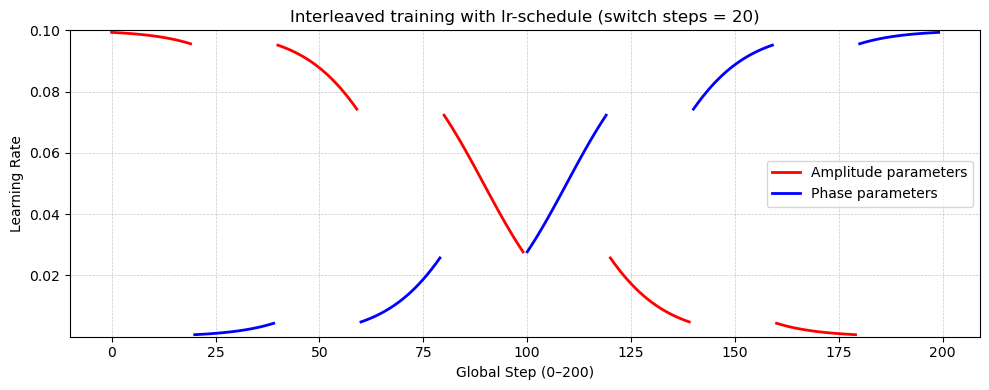

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Configuration
total_steps = 200
segment_length = 20  # switch steps
num_segments = total_steps // segment_length
segments_per_curve = 100 // segment_length  # number of segments per curve
k = 10  # steepness for sigmoid

# Learning rate bounds
min_lr, max_lr = 1e-6, 1e-1

# Initialize arrays
x = np.arange(total_steps)
y = np.zeros(total_steps)

# Track progress through the sigmoid curves
red_count = 0
blue_count = 0

# Construct interleaved sigmoid segments
for i in range(num_segments):
    start = i * segment_length
    end = start + segment_length
    if i % 2 == 0:  # Red segment (descends)
        t_idx = np.arange(segment_length) + red_count
        t = t_idx / (segments_per_curve * segment_length - 1)
        sig = 1 / (1 + np.exp(-k * (t - 0.5)))
        y[start:end] = -(2 * sig - 1)
        red_count += segment_length
    else:  # Blue segment (ascends)
        t_idx = np.arange(segment_length) + blue_count
        t = t_idx / (segments_per_curve * segment_length - 1)
        sig = 1 / (1 + np.exp(-k * (t - 0.5)))
        y[start:end] = 2 * sig - 1
        blue_count += segment_length

# Map from [-1, 1] to learning rate [min_lr, max_lr]
lr = (y + 1) / 2 * (max_lr - min_lr) + min_lr

# Plotting
plt.figure(figsize=(10, 4))
for i in range(num_segments):
    start = i * segment_length
    end = start + segment_length
    color = 'red' if i % 2 == 0 else 'blue'
    label = 'Amplitude parameters' if i == 0 else ('Phase parameters' if i == 1 else "")
    plt.plot(x[start:end], lr[start:end], color=color, linewidth=2, label=label)

plt.xlabel('Global Step (0–200)')
plt.ylabel('Learning Rate')
plt.title('Interleaved training with lr-schedule (switch steps = 20)')
plt.ylim(min_lr, max_lr)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()